# This is the numerical problem for the assignment A2


<div class="alert alert-block alert-info">
A tutorial for the solution of this problem is provided below.
</div>

## A simple pendulum inside a big plane-parallel plate capacitor 

The pendulum bob has a mass $m$ and a positive electric charge $q$. The capacitor plates are parallel
to the surface of the Earth.
The electric field inside the capacitor is directed vertically up and its magnitude is modulated by the pendulum motion as
$E(t) = E_0\,|\sin\theta (t)|$, where $\frac{qE_0}{mg} \equiv \delta < 1$ and
$\theta$ is the angle between the pendulum and the vertical line.
The initial conditions are $\theta(0) = \pi/2$ rad and $\dot{\theta} = 0$ rad/s.

(__a__) First, taking $\delta = 0$, estimate at which initial angle $\theta(0)$ the numerically obtained
period is equal to the period predicted by the formula $T = 2\pi\sqrt{\frac{L}{g}}$ with
the accuracy better than 1%.

(__b__) Find and plot the dependence of the period of oscillations of this pendulum on the parameter $\delta$.


(__c__) What will happen with the pendulum if $\delta = 1$?

### A hint

Because the Lorentz force $\mathbf{F}_e = q\mathbf{E}$ acts in the direction opposite to
the gravitational force,
it reduces the effective gravitational acceleration inside the capacitor from $g$
to $g - \frac{qE_0}{m}\,|\sin\theta\,|$. Therefore, 

### The equation of motion for this pendulum is

$\ddot{\theta} + \omega_0^2\,\sin\theta\,(1-\delta\,|\sin\theta\,|) = 0$,

where $\omega_0^2 = \frac{g}{L}$.

# The following tutorial 2 for the solution of the above numerical problem actually solves the computer problem C 3.1 (except its last question) from the textbook of Fowles and Cassiday.

### The tutorial problem

The exact equation of motion for a simple pendulum of length $L$ is
given by

$\ddot{\theta} + \omega_0^2\,\sin\theta = 0$,

where $\omega_0^2 = \frac{g}{L}$.

Find $\theta (t)$ by numerically integrating this equation of motion. Let $L = 1.0$ m and $g = 9.8$ m/s$^2$. 
Let the initial conditions be $\theta_0 = \pi/2$ rad and $\dot{\theta}= 0$ rad/s.

(__a__) Plot $\theta (t)$ from $t = 0$ to $4$ s. Also, plot the solution obtained by using the small-angle
approximation ($\sin\theta\approx 0$) on the same graph.

(__b__) Plot the period of the pendulum $T$ as a function of the amplitude $\theta_0$ from $0$ to $3.10$ rad.


### A solution of the tutorial problem

The above second-order ODE can be written as a system of two first-order ODEs as

$$
\dot{y_1} = y_2,\\ \ \
\dot{y_2} = - \omega_0^2\,\sin y_1,\\
$$

where $y_1 = \theta$,
with the following initial conditions: $y_1(0) = \pi /2$ and $y_2(0) = 0$.

# If you need help 
Examples and Python notebooks at https://github.com/UVic-CompPhys/physmath248-2018
will help you to find solutions of this and other problems and to present your solutions in a form of a python notebook. 
In particuar, some help for the solution of the present problem
can be found in the following notebooks: 

`Introduction.ipynb`

`Part.I 3. Introduction to Python programming.ipynb`

`Part.III 1. ODEs.ipynb`

In [1]:
# populate the interactive namespace with functions 
# from the modules numpy and matplotlib
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the following commands allow to produce a nice pdf version of the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
# the function defining the right-hand sides (RHS) of the ODEs
def dy_dt(y, t, omega02):
    y1, y2 = y
    dydt = [y2, -omega02*sin(y1)]
    return dydt

In [4]:
# the common parameters of the problem
L = 1.
g = 9.8
omega02 = g/L
omega0 = sqrt(omega02)

In [5]:
# populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint

# populate the interactive namespace with the function 
# that makes 1d interpolation
from scipy.interpolate import interp1d

### Solution (a)

In [6]:
# the integration time interval
t_start = 0.
t_end = 4. 
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

# the initial conditions
theta0 = pi/2.
y0 = [theta0, 0.]

In [7]:
# solve the ODEs
# the coefficient omega02 has been defined above
# args must be a tuple, e.g. args=(a,b)!!!
# a tuple with just one element a is (a,)

sol = odeint(dy_dt, y0, t, args=(omega02,))

The analytical solution of the approximate equation

$\ddot{\theta} = -\omega_0^2\,\theta$

that is obtained from the original ODE after the substitution of $\sin\theta\approx\theta$
for $\theta\ll 1$ is

$\theta (t) = \theta_0\cos(\omega_0 y)$.

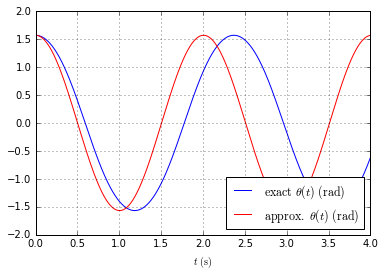

In [8]:
# plot the exact and approximate solutions
figure(1)

# the exact solution
plot(t, sol[:, 0], 'b', label='$\mathrm{exact}\ \\theta (t)\ (\mathrm{rad})$')

# the approximate solution is theta0*cos(omega0*t)
plot(t, theta0*cos(omega0*t), 'r', label='$\mathrm{approx.}\ \\theta (t)\ (\mathrm{rad})$')

legend(loc='lower right')
xlabel('$t\ (\mathrm{s})$')
grid()
show()

<div class="alert alert-block alert-info">
First, let's practice in finding the period from the exact solution using interpolation.
</div>

In [9]:
t_start = 0.
t_end = 4. 
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

# the initial conditions
theta0 = pi/2.
y0 = [theta0, 0.]

In [10]:
# solve the ODEs
# the coefficient omega02 has been defined above
# args must be a tuple, e.g. args=(a,b)!!!
# a tuple with just one element a is (a,)

sol = odeint(dy_dt, y0, t, args=(omega02,))

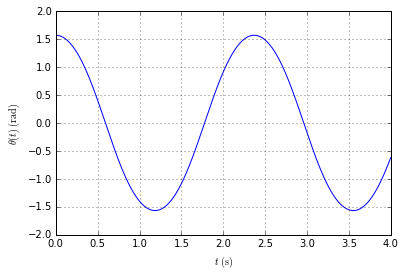

In [11]:
# plot the solution 
figure(1)

plot(t, sol[:, 0], 'b')
xlabel('$t\ (\mathrm{s})$')
ylabel("$\\theta (t)\ \mathrm{(rad)}$")
grid()
show()

In [12]:
# select a part of the solution between theta=theta0=sol[0,0] > 0. and theta=0
# its corresponding time interval is equal to T/4, where T is the period

theta = sol[0,0]
k = 0
while theta > 0.:
    k += 1
    theta = sol[k,0]
        
k = k+10 # to be sure that the point theta=0 is 
         # within the interpolation range

# interpolate the selected part of the solution as t(theta)
f = interp1d(sol[0:k,0],t[0:k])

period = 4.*f(0.)
print ("For theta_0 =",theta0,"the period is",period,"s")

For theta_0 = 1.5707963267948966 the period is 2.36904977773 s


### Solution (b)
#### Now, we are ready to calculate $T$ as a function of $\theta_0$.

In [13]:
# the integration time interval
t_start = 0.
t_end = 100. 
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

npar = 20
par = linspace(0,3.1,npar)
period = linspace(0,0,npar)

for i in range (npar):
    # the initial conditions are now changing
    y0 = [par[i],0.]
    
    # solve the ODEs
    sol = odeint(dy_dt, y0, t, args=(omega02,))
    
    # select a part of the solution between theta=theta0=sol[0,0] > 0. and theta=0
    # its corresponding time interval is equal to T/4, where T is the period

    theta = sol[0,0]
    k = 0
    while theta > 0.:
        k += 1
        theta = sol[k,0]
        
    k = k+10 # to be shure that the point theta=0 is 
             # within the interpolation range

    # interpolate the selected part of the solution as t(theta)
    f = interp1d(sol[0:k,0],t[0:k])

    period[i] = 4.*f(0.)
    print ("For theta_0 =",par[i],"the period is",period[i],"s")

For theta_0 = 0.0 the period is 0.3600360036 s
For theta_0 = 0.163157894737 the period is 2.01043488107 s
For theta_0 = 0.326315789474 the period is 2.0205292619 s
For theta_0 = 0.489473684211 the period is 2.03756289498 s
For theta_0 = 0.652631578947 the period is 2.06186093791 s
For theta_0 = 0.815789473684 the period is 2.0939035141 s
For theta_0 = 0.978947368421 the period is 2.1343541031 s
For theta_0 = 1.14210526316 the period is 2.18410437528 s
For theta_0 = 1.30526315789 the period is 2.24433929074 s
For theta_0 = 1.46842105263 the period is 2.31662570668 s
For theta_0 = 1.63157894737 the period is 2.40306965752 s
For theta_0 = 1.79473684211 the period is 2.50653454242 s
For theta_0 = 1.95789473684 the period is 2.6310323374 s
For theta_0 = 2.12105263158 the period is 2.78237762476 s
For theta_0 = 2.28421052632 the period is 2.96942704735 s
For theta_0 = 2.44736842105 the period is 3.20662959131 s
For theta_0 = 2.61052631579 the period is 3.52003184259 s
For theta_0 = 2.7736842

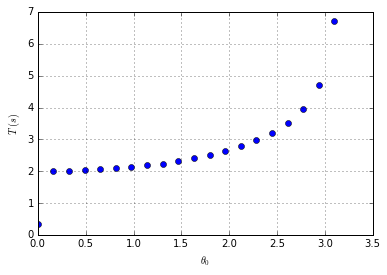

In [14]:
# plot T as a function of theta0
figure(2)

plot(par, period, 'bo')
xlabel('$\\theta_0$')
ylabel('$T\ (s)}$')
grid()
show()